In [1]:
import pickle
import pandas as pd
from pprint import pprint
from collections import defaultdict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
with open("GS_augmented_2017_iclr.pickle", "rb") as f:
    org_papers = pickle.load(f)

In [3]:
keys = list(org_papers.keys())

for k in keys:
    if org_papers[k]["label"] == "Invite":
        del org_papers[k]

In [4]:
len(org_papers)

443

In [5]:
count = 0

for p in org_papers:
    if len(org_papers[p]["cit_count_gs"]) > 0 or len(org_papers[p]["pub_count_gs"]) > 0:
        count +=1

In [6]:
count

432

In [7]:
s = set()
for k in org_papers:
    s.add(org_papers[k]["label"])

In [8]:
s

{'Accept', 'Reject'}

In [9]:
for k in org_papers:
    if len(org_papers[k]["cit_count_gs"]) > 0:
        org_papers[k]["gs_cit_stat"] = [np.mean(org_papers[k]["cit_count_gs"]), np.max(org_papers[k]["cit_count_gs"]), np.min(org_papers[k]["cit_count_gs"]), np.median(org_papers[k]["cit_count_gs"])]
    if len(org_papers[k]["pub_count_gs"]) > 0:
        org_papers[k]["gs_pub_stat"] = [np.mean(org_papers[k]["pub_count_gs"]), np.max(org_papers[k]["pub_count_gs"]), np.min(org_papers[k]["pub_count_gs"]), np.median(org_papers[k]["pub_count_gs"])]

In [10]:
# Stats for missing papers
missing_papers = [0, 0, 0, 0]

for k in org_papers:
    if not "gs_cit_stat" in org_papers[k]:
        if org_papers[k]["label"].lower() == "accept":
            missing_papers[0] += 1
        elif org_papers[k]["label"].lower() == "reject":
            missing_papers[1] += 1
    if not "gs_pub_stat" in org_papers[k]:
        if org_papers[k]["label"].lower() == "accept":
            missing_papers[2] += 1
        elif org_papers[k]["label"].lower() == "reject":
            missing_papers[3] += 1

print(missing_papers)

[0, 11, 0, 11]


## Save as pickle file

In [11]:
with open("GS_MMM_cit_pub_count_2017.pickle", "wb") as f:
    pickle.dump(org_papers, f)

In [12]:
cp GS_MMM_cit_pub_count_2017.pickle ../features/

## Plot max/mean/min/mean cit count vs decision by buckets

In [13]:
acc_cit = [[], [], [], []]
rej_cit = [[], [], [], []]

for k in org_papers:
    if "gs_cit_stat" in org_papers[k]:
        if org_papers[k]["label"].lower() == "accept":
            acc_cit[0].append(org_papers[k]["gs_cit_stat"][0])
            acc_cit[1].append(org_papers[k]["gs_cit_stat"][1])
            acc_cit[2].append(org_papers[k]["gs_cit_stat"][2])
            acc_cit[3].append(org_papers[k]["gs_cit_stat"][3])
        elif org_papers[k]["label"].lower() == "reject":
            rej_cit[0].append(org_papers[k]["gs_cit_stat"][0])
            rej_cit[1].append(org_papers[k]["gs_cit_stat"][1])
            rej_cit[2].append(org_papers[k]["gs_cit_stat"][2])
            rej_cit[3].append(org_papers[k]["gs_cit_stat"][3])

### Max/Mean/Min Citation count

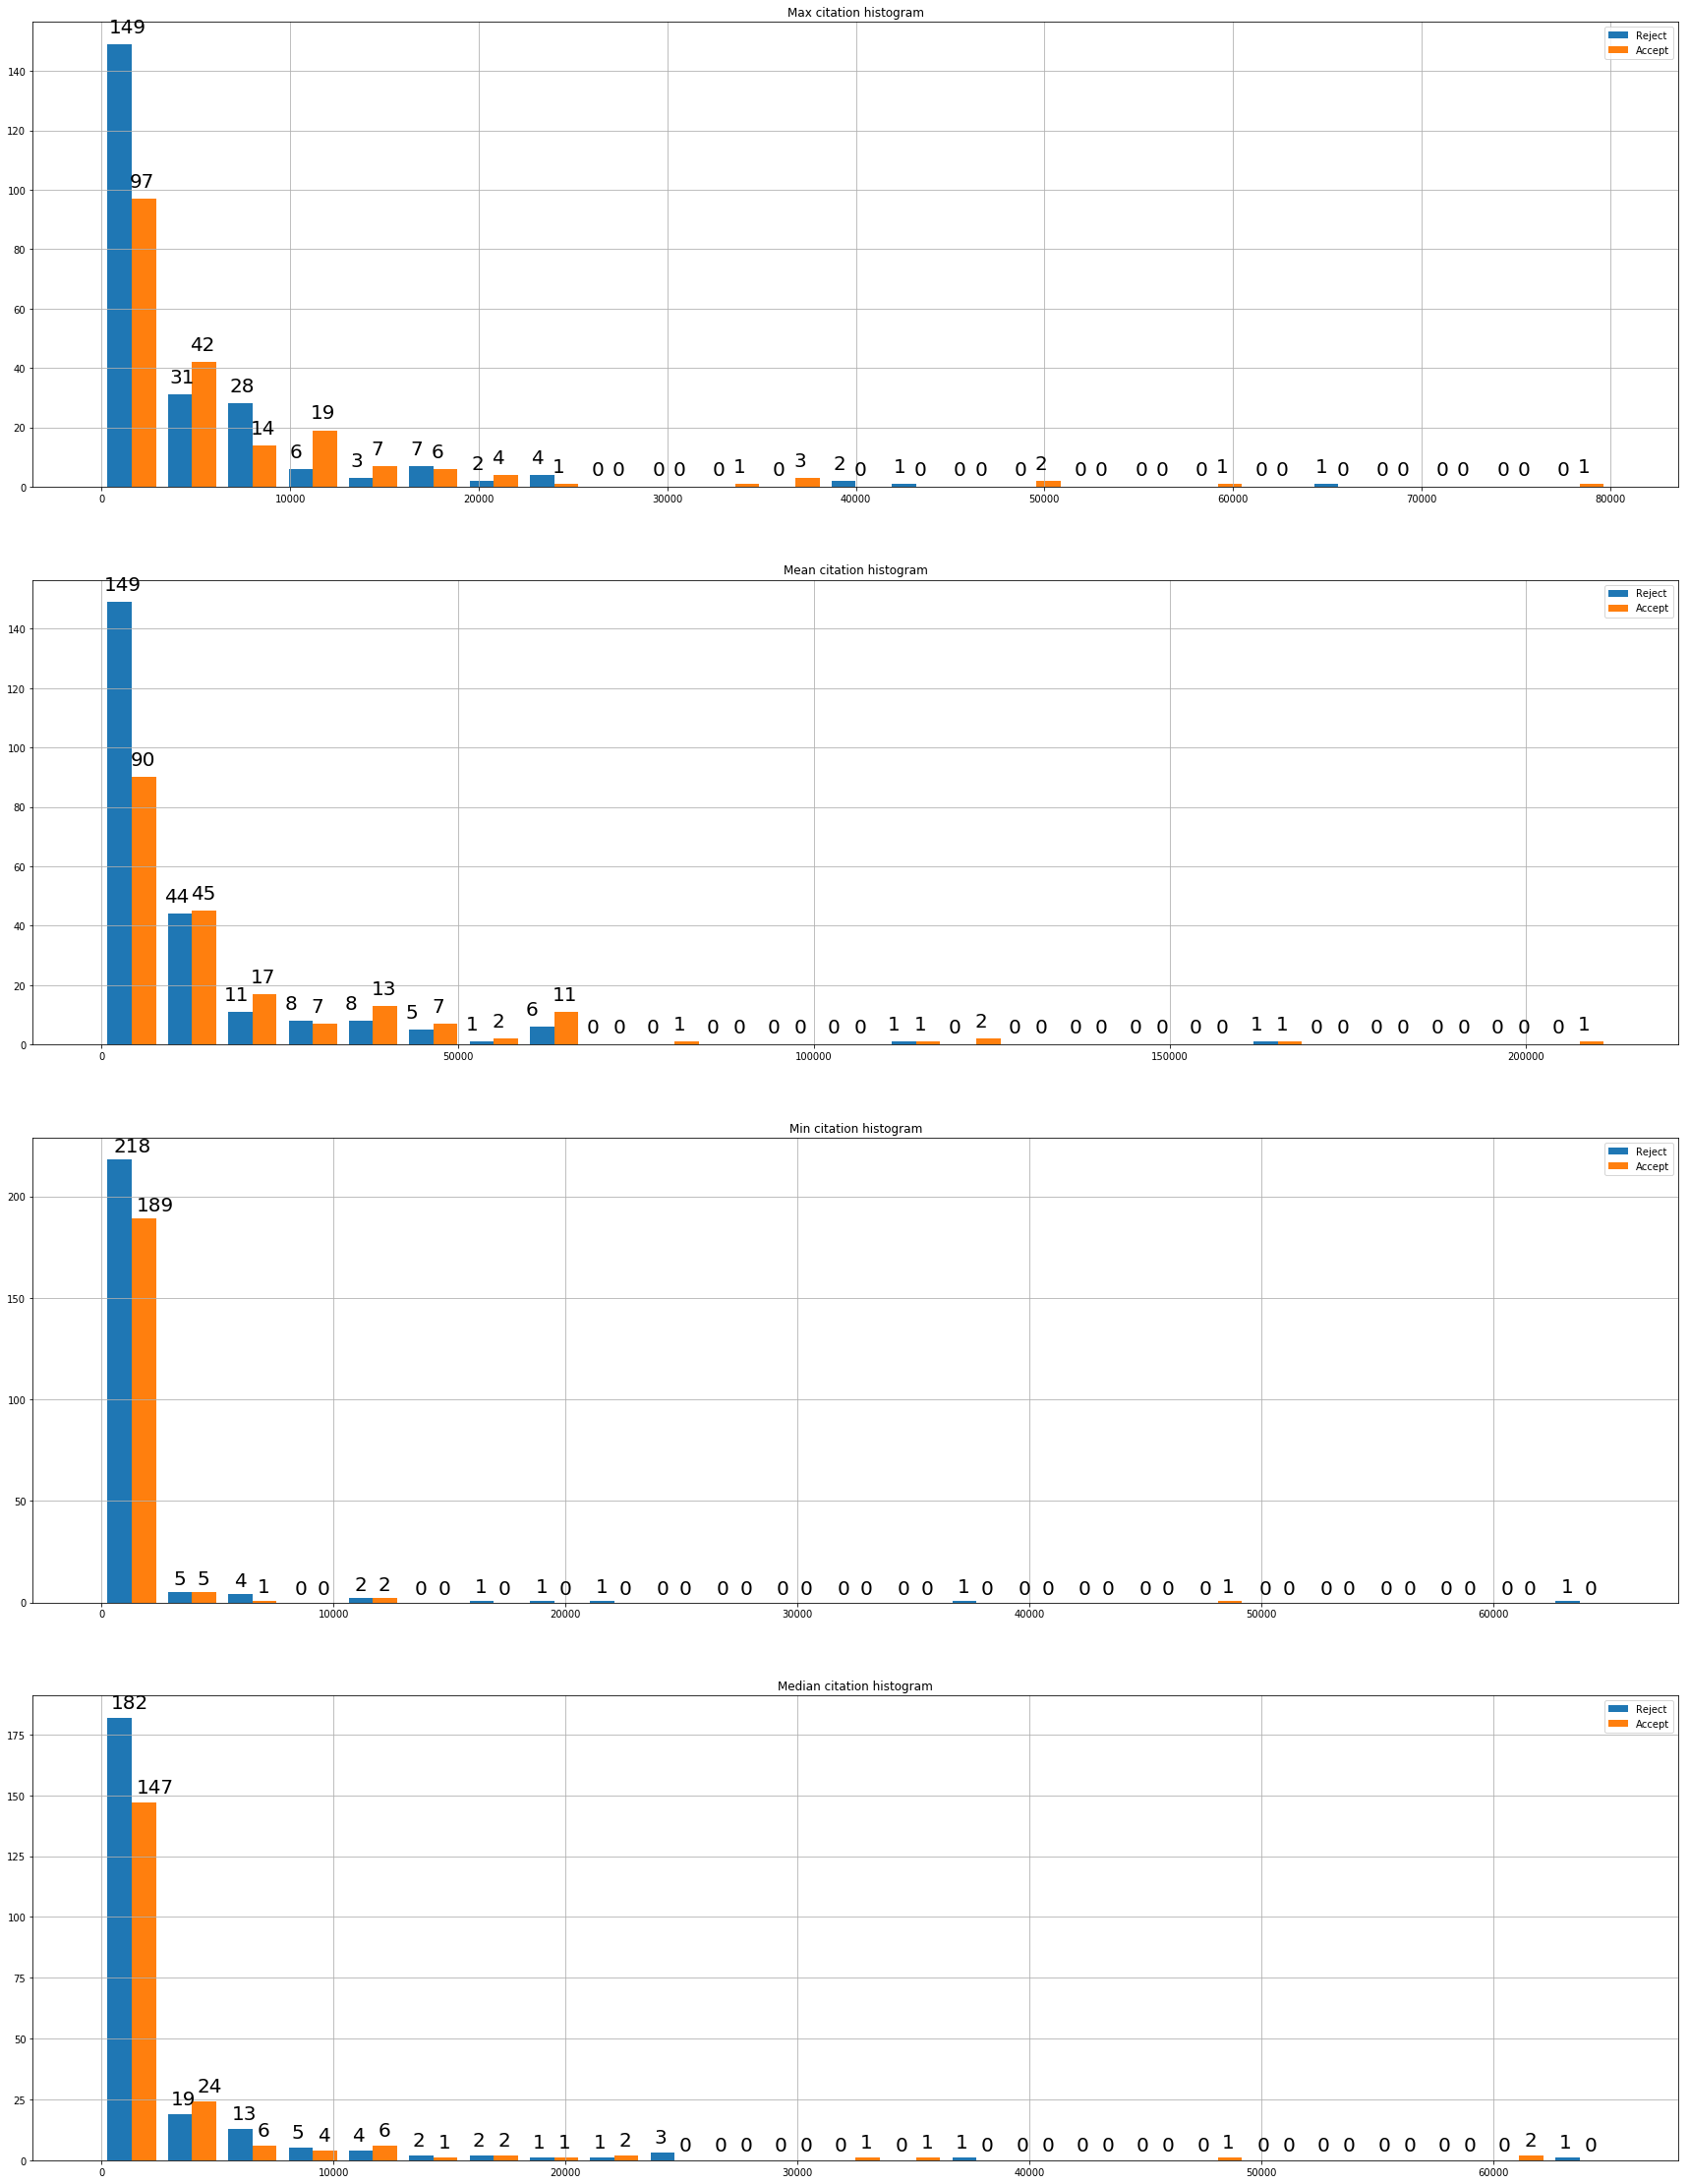

In [67]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30, 40))

# Max
x1 = sorted(rej_cit[0])
x2 = sorted(acc_cit[0])
n, bins, patches = ax1.hist([x1,x2], bins=25, label=["Reject", "Accept"])
for index,d in enumerate(n[0]):
    ax1.text(x=bins[index]+400 , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
for index,d in enumerate(n[1]):
    ax1.text(x=bins[index]+1500 , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
ax1.legend(loc='upper right')
ax1.set_title('Max citation histogram')
ax1.grid()

# Mean
x1 = sorted(rej_cit[1])
x2 = sorted(acc_cit[1])
n, bins, patches = ax2.hist([x1,x2], bins=25, label=["Reject", "Accept"])
for index,d in enumerate(n[0]):
    ax2.text(x=bins[index]+300, y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
for index,d in enumerate(n[1]):
    ax2.text(x=bins[index]+4000 , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
ax2.legend(loc='upper right')
ax2.set_title('Mean citation histogram')
ax2.grid()

# Min
x1 = sorted(rej_cit[2])
x2 = sorted(acc_cit[2])
n, bins, patches = ax3.hist([x1,x2], bins=25, label=["Reject", "Accept"])
for index,d in enumerate(n[0]):
    ax3.text(x=bins[index]+500, y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
for index,d in enumerate(n[1]):
    ax3.text(x=bins[index]+1500 , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
ax3.legend(loc='upper right')
ax3.set_title('Min citation histogram')
ax3.grid()

# Median
x1 = sorted(rej_cit[3])
x2 = sorted(acc_cit[3])
n, bins, patches = ax4.hist([x1,x2], bins=25, label=["Reject", "Accept"])
for index,d in enumerate(n[0]):
    ax4.text(x=bins[index]+400, y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
for index,d in enumerate(n[1]):
    ax4.text(x=bins[index]+1500 , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
ax4.legend(loc='upper right')
ax4.set_title('Median citation histogram')
ax4.grid()

plt.savefig("../images/GS_citation_stats.png")
plt.show()

# Max, Mean, Min, Median pub count

In [14]:
acc_pub = [[], [], [], []]
rej_pub = [[], [], [], []]

for k in org_papers:
    if "gs_pub_stat" in org_papers[k]:
        if org_papers[k]["label"].lower() == "accept":
            acc_pub[0].append(org_papers[k]["gs_pub_stat"][0])
            acc_pub[1].append(org_papers[k]["gs_pub_stat"][1])
            acc_pub[2].append(org_papers[k]["gs_pub_stat"][2])
            acc_pub[3].append(org_papers[k]["gs_pub_stat"][3])
        elif org_papers[k]["label"].lower() == "reject":
            rej_pub[0].append(org_papers[k]["gs_pub_stat"][0])
            rej_pub[1].append(org_papers[k]["gs_pub_stat"][1])
            rej_pub[2].append(org_papers[k]["gs_pub_stat"][2])
            rej_pub[3].append(org_papers[k]["gs_pub_stat"][3])

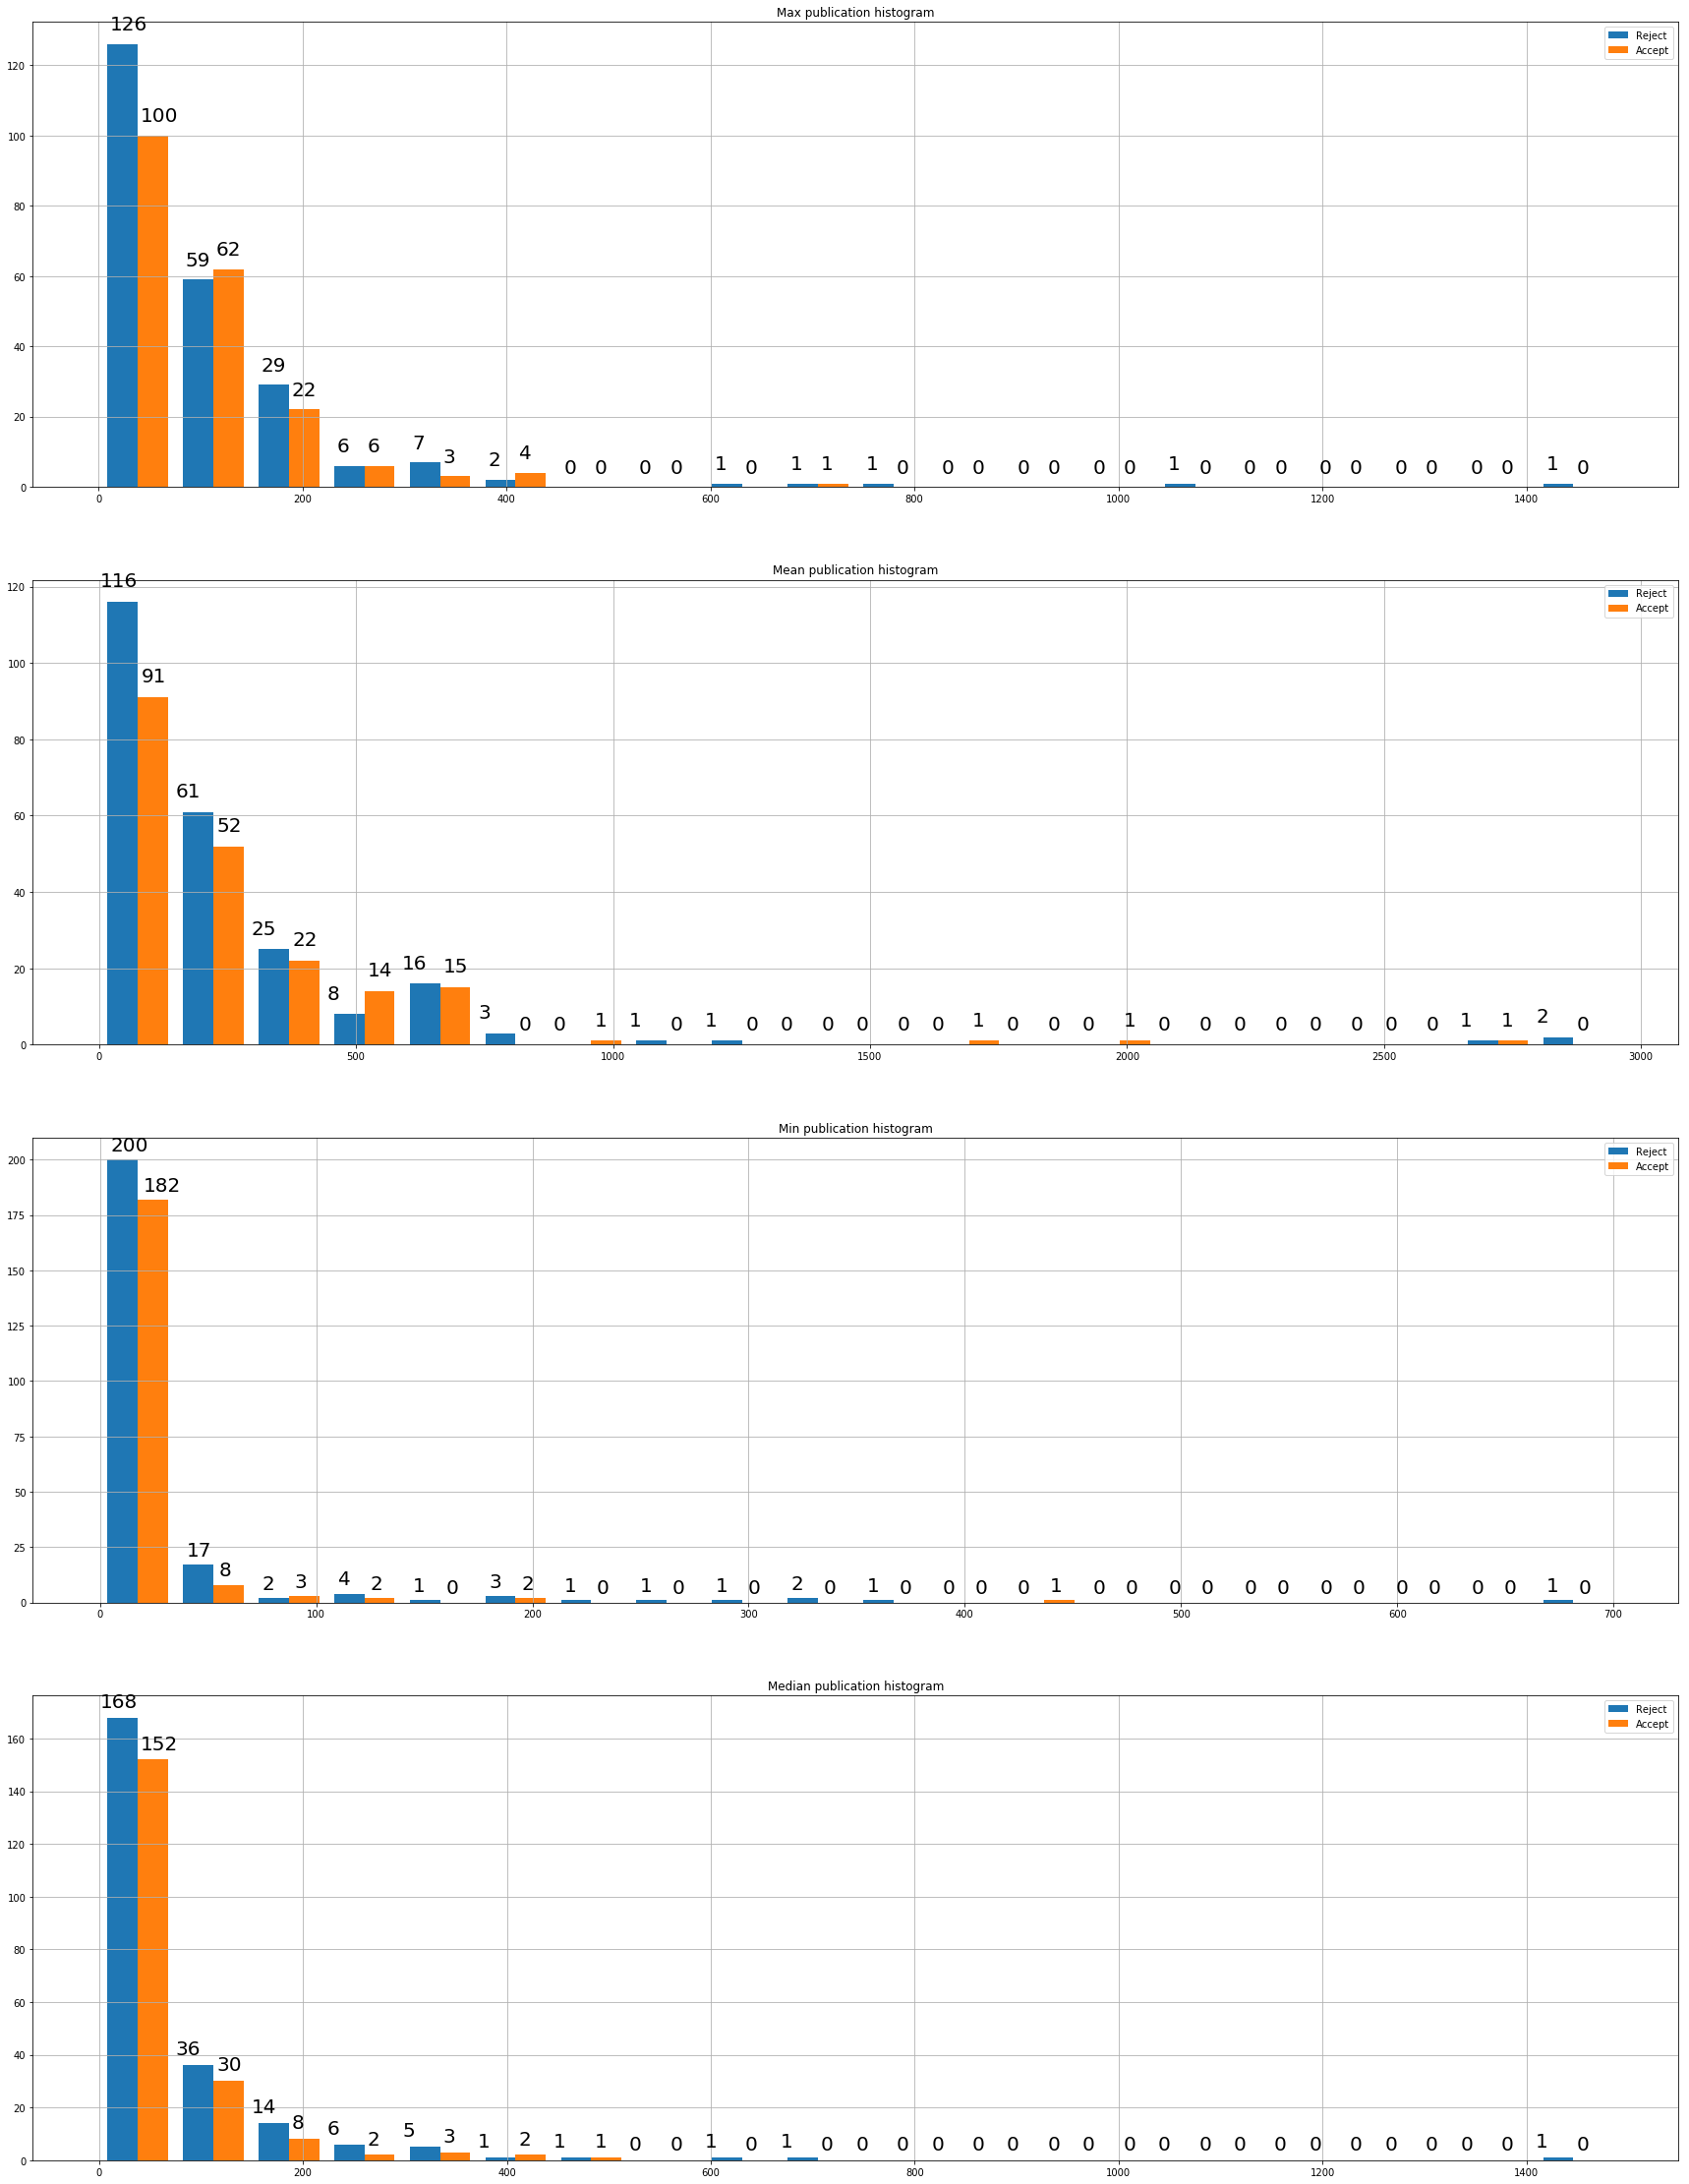

In [53]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(30, 40))

# Max
x1 = sorted(rej_pub[0])
x2 = sorted(acc_pub[0])
n, bins, patches = ax1.hist([x1,x2], bins=20, label=["Reject", "Accept"])
for index,d in enumerate(n[0]):
    ax1.text(x=bins[index]+10, y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
for index,d in enumerate(n[1]):
    ax1.text(x=bins[index]+40 , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
ax1.legend(loc='upper right')
ax1.set_title('Max publication histogram')
ax1.grid()

# Mean
x1 = sorted(rej_pub[1])
x2 = sorted(acc_pub[1])
n, bins, patches = ax2.hist([x1,x2], bins=20, label=["Reject", "Accept"])
for index,d in enumerate(n[0]):
    ax2.text(x=bins[index] , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
for index,d in enumerate(n[1]):
    ax2.text(x=bins[index]+80 , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
ax2.legend(loc='upper right')
ax2.set_title('Mean publication histogram')
ax2.grid()

# Min
x1 = sorted(rej_pub[2])
x2 = sorted(acc_pub[2])
n, bins, patches = ax3.hist([x1,x2], bins=20, label=["Reject", "Accept"])
for index,d in enumerate(n[0]):
    ax3.text(x=bins[index]+5, y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
for index,d in enumerate(n[1]):
    ax3.text(x=bins[index]+20 , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
ax3.legend(loc='upper right')
ax3.set_title('Min publication histogram')
ax3.grid()

# Median
x1 = sorted(rej_pub[3])
x2 = sorted(acc_pub[3])
n, bins, patches = ax4.hist([x1,x2], bins=20, label=["Reject", "Accept"])
for index,d in enumerate(n[0]):
    ax4.text(x=bins[index] , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
for index,d in enumerate(n[1]):
    ax4.text(x=bins[index]+40 , y=d+4, s="{0:g}".format(d),fontdict=dict(fontsize=20))
ax4.legend(loc='upper right')
ax4.set_title('Median publication histogram')
ax4.grid()

plt.savefig("../images/GS_publication_stats.png")
plt.show()

In [36]:
n, bins, patches = ax3.hist([x1,x2], bins=20, label=["Reject", "Accept"])

In [37]:
n

[array([168.,  36.,  14.,   6.,   5.,   1.,   1.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([152.,  30.,   8.,   2.,   3.,   2.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])]

In [38]:
bins

array([1.0000e+00, 7.5100e+01, 1.4920e+02, 2.2330e+02, 2.9740e+02,
       3.7150e+02, 4.4560e+02, 5.1970e+02, 5.9380e+02, 6.6790e+02,
       7.4200e+02, 8.1610e+02, 8.9020e+02, 9.6430e+02, 1.0384e+03,
       1.1125e+03, 1.1866e+03, 1.2607e+03, 1.3348e+03, 1.4089e+03,
       1.4830e+03])

In [39]:
patches

<a list of 2 Lists of Patches objects>

In [44]:
patches[0].patches[0].__dict__

{'_agg_filter': None,
 '_alpha': None,
 '_animated': False,
 '_antialiased': True,
 '_axes': <matplotlib.axes._subplots.AxesSubplot at 0x7f085cbf0048>,
 '_capstyle': 'butt',
 '_clipon': True,
 '_clippath': None,
 '_combined_transform': <matplotlib.transforms.IdentityTransform at 0x7f085cbf82e8>,
 '_contains': None,
 '_dashes': None,
 '_dashoffset': None,
 '_edgecolor': (0.0, 0.0, 0.0, 0.0),
 '_facecolor': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313,
  1.0),
 '_fill': True,
 '_gid': None,
 '_hatch': None,
 '_hatch_color': (0.0, 0.0, 0.0, 1.0),
 '_height': 168.0,
 '_in_layout': True,
 '_joinstyle': 'miter',
 '_label': 'Reject',
 '_linestyle': 'solid',
 '_linewidth': 1.0,
 '_mouseover': False,
 '_oid': 0,
 '_original_edgecolor': None,
 '_original_facecolor': array([0.17254902, 0.62745098, 0.17254902, 1.        ]),
 '_path_effects': [],
 '_picker': None,
 '_propobservers': {},
 '_rasterized': None,
 '_rect_transform': <matplotlib.transforms.CompositeGenericTransform a